### 1. [Знакомство с данными](#paragraph1)

### 2. [Предобработка данных](#paragraph2)
   1. [Замена пропущенных значений](#subparagraph2.1)
   2. [Изменение типа данных](#subparagraph2.2)
   

### 3. [Добавление новых параметров](#paragraph3)
   1. [Цена за квадратный метр](#subparagraph3.1)
   2. [День, месяц, год публикации объявления](#subparagraph3.2)
   3. [Этаж квартиры](#subparagraph3.3)
   4. [Cоотношение жилой и общей площади, а также отношение площади кухни к общей](#subparagraph3.4)
   
### 4. [Исследовательский анализ](#paragraph4)
   1. [Изучение признаков: площадь, цена, число комнат, высота потолков](#subparagraph4.1)
   2. [Избавляемся от редких и выбивающихся значений](#subparagraph4.2)
   4. [Определение факторов больше всего влияющих на стоимость квартиры](#subparagraph4.3)

<a name="paragraph1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
data = pd.read_csv('D:/Education/ЯП/Курсы/2/Project/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Большинство значений параметров имеют тип float. Таким параметрам, как: `last_price`, `balcony`, `days_exposition`, `floors_total`, `parks_around3000`, `ponds_around3000` тип присвоен не верно. Например, количество балконов не может быть числом с плавающей точкой. Поэтому все перечисленные параметры должны быть целочисленными. Значения параметра `is_apartment` должны быть типа bool. А `first_day_exposition` нужно привести к типу datetime. Далее используя метод describe проведем первичное знакомство с параметрами таблицы.


1. `ceiling_height`. В основном высота потолков равна 2.6 метрам. Средняя высота превышает медианную из-за наличия выбросов, а именно имеется 1 значение с высотой 100 метров и 22 значения с высотой более 20 метров. Заменить пропуски и выбросы можно будет медианным значением, потому что оно более точно отражает ситуацию на рынке.
2. `floors_total`. Параметр имеет хорошие значения, в среднем квартиры продаются в девятиэтажных домах. Значение `floors_total` должны быть целочисленными, позже мы это исправим.
3. `living_area`. Имеются выбросы, которые можно будет заменить. Пропущенные значения составляют 8% от всех данных, что говорит о необходимости заменить их медианными.
4. `is_apartment`. Больше всего пропусков в параметре `is_apartment`, это логично, т.к в большей части объявлений продаются именно квартиры, поэтому пропуски можно заменить на False. После такой замены в этом столбце останется 50 значений равных True, а это всего лишь 0.21% от всех значений, что говорит о том, что мы можем избавиться от этого столбца.
5. `kitchen_area`. В среднем кухни в нашей выборке имеют площадь равную 9 квадратных метров, эти значения хорошо коррелируют со значениями параметра `total_area`. Также имеются выбросы и пропуски.
6. `balcony`. В датасете имеется большое количество пропусков. Пропуски в столбце `balcony` можно заменить на 0, что будет говорить о том, что человек не указал их, потому что их скорее всего нет.
7. `locality_name`. Данный параметр имеет, всего лишь, 49 пропусков, от которых можно избавиться.
8. `airports_nearest`. Пропуски и выбросы будет логичнее заменить на медианные значения в зависимости от населенного пункта (locality_name).
9. `cityCenters_nearest`. Таже ситуация, что и с `airports_nearest`.
10. `parks_around3000` и `ponds_around3000`. Имеют одинаковое число пропусков. Логичнее будет их заменить на 0, потому что скорее всего парки и водоемы в этом радиусе отсутствуют.
11. `parks_nearest`. Парки в основном находятся в 500 метрах от квартир.
12. `ponds_nearest`. Водоемы в основном находятся в 500 метрах от квартир. Удивительно, что максимальное расстояние от квартиры до водоема всего лишь 1344 метра.
13. `days_exposition`. Пропусков около 10%. Скорее всего, среди пропусков имеется часть активных объявлений. 

### Вывод

8 параметрам присвоен неподходящий тип. 14 столбцов имеют пропуски, большинство из которых заменим медианой, так как почти каждый параметр имеет выбросы, медиана их сгладит. От выбросов мы избавимся в следующих пунктах.

<a name="paragraph2"></a>
## 2 Предобработка данных

<a name="subparagraph2.1"></a>
### 2.1 Замена пропущенных значений

In [104]:
#Прежде всего проверим датасет на наличие дубликатов
data.duplicated().sum()

0

In [4]:
parameters_filled_with_median = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'floors_total']
for parameter in parameters_filled_with_median:
    data[parameter] = data[parameter].fillna(data[parameter].median())

parameters_filled_with_zero = ['balcony', 'parks_around3000', 'ponds_around3000']
for parameter in parameters_filled_with_zero:
    data[parameter] = data[parameter].fillna(data[parameter].median())

# Пропуски в is_apartment заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)

- В первую очередь нужно заполнить пропуски в `floors_total`. Для этого создадим столбец, в котором значения столбца `floor` разделим на 3 группы, до 9 этажей, от 10 до 20 этажей, и от 20 и выше. Пропуски заполним средним по каждой группе. 
- Параметры `living_area` зависит от количества комнат в квартире (rooms) и от количества этажей в доме (floors_total), поэтому нужно будет заменить пропуски медианными значениями в зависимости от этих параметров. 
- `kitchen_area` сильно коррелирует со значениями `total_area`, поэтому будет логично заменить пропуска на медианные значения kitchen_area в зависимости от общей площади.
- Высота потолков `ceiling_height` обычно зависит от типа дома. Предположительный тип дома мы можем понять по количеству его этажей (floors_total).

In [26]:
def floor_by_group(row):
    if row.floor <= 9:
        return 'До 9 этажей'
    elif  9 < row.floor <= 20:
        return  '10-20 этажей'
    else:
        return 'Более 20 этажей'

data['floor_by_group'] = data.apply(floor_by_group, axis=1)

def total_area_by_group(row):
    if row['total_area'] <= 35:
        return 'до 35 кв м'
    elif row['total_area'] > 35 and row['total_area'] <= 70:
        return '35-70 кв м'
    else:
        return 'больше 70 кв м'
    
data['total_area_by_group'] = data.apply(total_area_by_group, axis=1)

In [27]:
# Заменим пропуски на медианные значения
data['floors_total'] = data.groupby('floor_by_group')['floors_total'].apply(lambda x: x.fillna(x.mean()))
data['living_area'] = data.groupby(['rooms', 'floors_total'])['living_area'].apply(lambda x: x.fillna(x.median()))
data['kitchen_area'] = data.groupby('total_area_by_group')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'] = data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23625 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23625 non-null  int64         
 1   last_price              23625 non-null  int32         
 2   total_area              23625 non-null  float64       
 3   first_day_exposition    23625 non-null  datetime64[ns]
 4   rooms                   23625 non-null  int64         
 5   ceiling_height          23624 non-null  float64       
 6   floors_total            23625 non-null  int32         
 7   living_area             23625 non-null  float64       
 8   floor                   23625 non-null  int64         
 9   is_apartment            23625 non-null  bool          
 10  studio                  23625 non-null  bool          
 11  open_plan               23625 non-null  bool          
 12  kitchen_area            23625 non-null  float6

<a name="subparagraph2.2"></a>
### 2.2 Изменение типа данных

Для таких метрик, как стоимость, количество парков/водоемов/балконов, площадь и расстояние подойдет больше целочисленный тип. Также изменим тип даты публикации (first_day_exposition) на тип для даты и времени *datetime64*.

In [7]:
parameters_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
                  'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for parameter in parameters_to_int:
    data[parameter] = data[parameter].astype(int)

# Изменеие типа для даты публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Вывод
Пропуски почти во всех параметрах были заменены медианой. В `balcony`, `ponds_around3000` и `parks_around3000` пропуски были замены нулем. Пропуски в столбце `is_apartment` были заменены на False. Тип большнства параметров изменил на целочисленный, а также привел `first_day_exposition` к типу datetime.

<a name="paragraph3"></a>
## 3 Добавление новых параметров в таблицу

Добавим в нашу таблицу следующие параметры: 
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

<a name="subparagraph3.1"></a>
### 3.1 Цена квадратного метра

In [8]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

<a name="subparagraph3.2"></a>
### 3.2 День недели, месяц и год публикации объявления

In [9]:
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

<a name="subparagraph3.3"></a>
### 3.3 Этаж квартиры

In [10]:
def floor_by_group(row):
    if row.floor == 1:
        return 'Первый'
    elif row.floor == row.floors_total:
        return  'Последний'
    else:
        return 'Другой'
data['floor_by_group'] = data.apply(floor_by_group, axis=1)

<a name="subparagraph3.4"></a>
### 3.4 Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [11]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']
data.ceiling_height.describe()

count    23698.000000
mean         2.735329
std          0.994340
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<a name="paragraph4"></a>
## 4 Исследовательский анализ данных

<a name="subparagraph4.1"></a>
### 4.1 Изучение параметров

Text(0, 0.5, 'Количество объявлений')

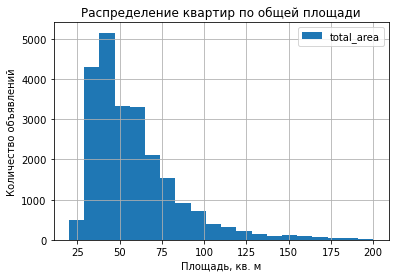

In [12]:
data.plot(kind='hist', y ='total_area', grid=True, bins=20, range=(20, 200))
plt.title('Распределение квартир по общей площади') 
plt.xlabel('Площадь, кв. м')
plt.ylabel('Количество объявлений')

В основном общая площадь квартир колеблится в пределах 30-50 кв. м.

Text(0, 0.5, 'Количество объявлений')

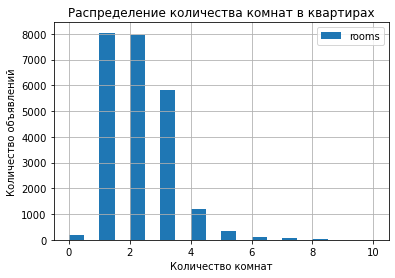

In [13]:
data.plot(kind='hist', y ='rooms', grid=True, bins=20, range=(0, 10))
plt.title('Распределение количества комнат в квартирах') 
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

В основном наш датафрейм состоит из 1-3 комнатных квартир, что соответствует действительному положению на рынке недвижимости. Также на гистограмме видно, что присутствует значения равные 0, чего быть не может. 

Text(0, 0.5, 'Количество объявлений')

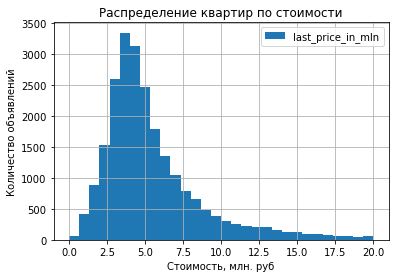

In [14]:
# Приведем стоимость к более наглядному виду.
data['last_price_in_mln'] = data['last_price'] * 1e-6
data.plot(kind='hist', y ='last_price_in_mln', grid=True, bins=30, range=(0, 20))
plt.title('Распределение квартир по стоимости')
plt.xlabel('Стоимость, млн. руб')
plt.ylabel('Количество объявлений')

Большинство квартир имеют стоимость от 2.5 до 5 миллионов 

count    23698.000000
mean         2.735329
std          0.994340
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

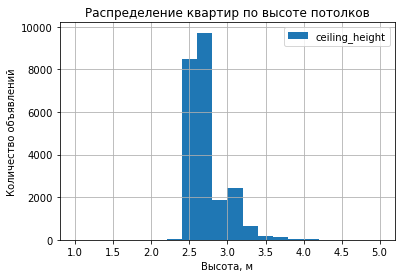

In [15]:
data.plot(kind='hist', y ='ceiling_height', grid=True, bins=20, range=(1, 5))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество объявлений')
data['ceiling_height'].describe()

В среднем потолки имеют высоту в пределах 2.5-2.8 метров. Также имеются разбросы.

Сгруппируем параметр days_exposition с годом размещения объявления year и заменим пропущенные значения медианой. Затем построим гистограмму распределения квартир по продолжительности размещения объявления 

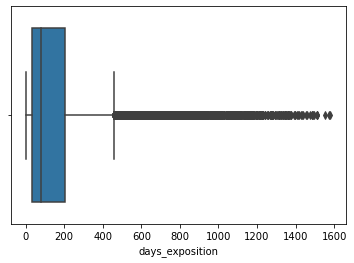

In [16]:
data['days_exposition'] = data.groupby('year')['days_exposition'].apply(lambda x: x.fillna(x.median()))
sns.boxplot(x=data['days_exposition'])
plt.show()

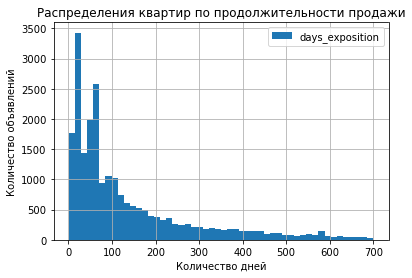

In [17]:
data.plot(kind='hist', y ='days_exposition', grid=True, bins=50, range=(1, 700))
plt.title('Распределения квартир по продолжительности продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

Среднее продолжительность размещения объявления в два раза выше медианного  значения. Это означает, что среди значений параметра имеется большое число выбросов. Также на диаграмме видно два пика в районе 25 и 65 дней.

<a name="subparagraph4.2"></a>
### 4.2 Избавляемся от редких и выбивающихся значений

Почти во всех параметрах имеются выбросы. Мы же остановимся на рассмотрении наиболее важных параметров.

#### 4.2.1 Проанализируем общую площадь квартир

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

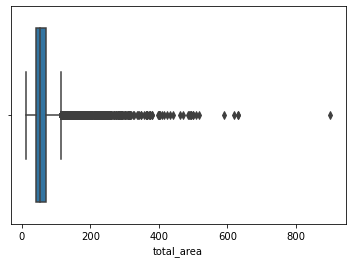

In [18]:
sns.boxplot(x=data['total_area'])
data['total_area'].describe()

Отбросим квартиры с площадью меньше 20 квадратных метров. Квартиры с аномально большой площадью пока не будем считать выбросами, так как они могут быть элитными домами.

In [19]:
# Отбросим квартиры с площадью меньше 20 квадратных метров
data = data.query('total_area >= 20')

#### 4.2.2 Проанализируем стоимость квартир

count    23672.000000
mean         6.546788
std         10.892090
min          0.012190
25%          3.429000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_in_mln, dtype: float64

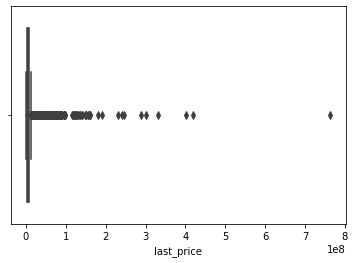

In [20]:
# Для большей наглядности воспользуемся значениями цены в млн.
sns.boxplot(x=data['last_price'])
data['last_price_in_mln'].describe()

В датафрейме имеется аномально низкий выброс равный 12190 рублей, который мы позже отбросим. Квартиры дешевле 1 млн не являются выбросами, в этом случае низкая цена объясняется небольшим населенным  пунктом. На графике видно, что имеется много квартир, стоимость которых превышают 200 млн. Пока не будем приписывать эти значения к выбросам, возможно такие значения из-за их площади, поэтому проверим общую площадь этих квартир.

In [21]:
data = data.query('last_price >= 300000')
data.query('last_price_in_mln > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,floor_by_group,total_area_by_group,price_per_square_meter,day_of_the_week,month,year,living_area_part,kitchen_area_part,last_price_in_mln
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,233.0,Другой,больше 70 кв м,1.736842e+06,2,4,2018,0.500000,0.210526,330.0000
5893,3,230000000,500.0,2017-05-31,6,3.00,7,155.5,7,False,...,50.0,Последний,больше 70 кв м,4.600000e+05,2,5,2017,0.311000,0.080000,230.0000
12971,19,763000000,400.0,2017-09-30,7,2.60,10,250.0,10,False,...,33.0,Последний,больше 70 кв м,1.907500e+06,5,9,2017,0.625000,0.032500,763.0000
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,199.0,Последний,больше 70 кв м,5.853659e+05,5,4,2017,0.531707,0.097561,240.0000
14706,15,401300000,401.0,2016-02-20,5,2.55,9,204.0,9,False,...,393.0,Последний,больше 70 кв м,1.000748e+06,5,2,2016,0.508728,0.059850,401.3000
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,111.0,Другой,больше 70 кв м,4.854369e+05,0,12,2017,0.417476,0.113269,300.0000
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,249.0,Другой,больше 70 кв м,8.575429e+05,0,4,2017,0.639832,0.104305,245.0000
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,106.0,Последний,больше 70 кв м,4.666667e+05,2,12,2017,0.455222,0.124444,420.0000
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,23.0,Последний,больше 70 кв м,1.542605e+06,1,3,2019,0.339733,0.161067,289.2384


Как и предполагалось в основном высокую стоимость имеют квартиры с большой площадью. Поэтому посмотрим на зависимость цены от общей площади.

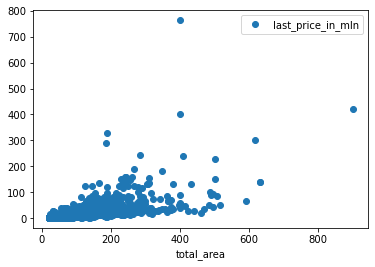

In [22]:
data.plot(x='total_area', y='last_price_in_mln', style='o')
plt.show()

Выбросы есть, но их не так много, в основном большая площадь объясняются высокой ценой, но при этом есть случаи большой общей площади с низкой ценой. Избавимся от таких значений, для этого возьмем квартиры в Санкт-Петербурге и разделим их цену в млн на общую площадь, это значение не должно превышать 0.05. То есть квартира с общей площадью 100 кв. м должна стоить от 5 миллионов рублей. Если бы данные были представлены за 2020 год, можно было бы повысить этот коэффициент, но так как у нас присутствуют данные объявлений с 2014 года, из-за ежегодного подорожания недвижимости нужно более точно рассчитать коэффициент отношения цены в млн к общей площади. 

In [23]:
coef = data.last_price_in_mln / data.total_area
data = data.query('@coef > 0.05 or locality_name != "Санкт-Петербург"')

#### 4.2.3 Проанализируем жилую площадь квартир

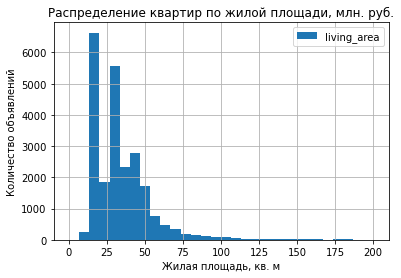

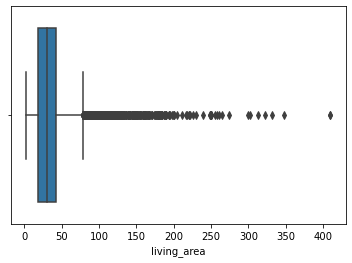

count    23647.000000
mean        34.344052
std         21.625542
min          2.000000
25%         18.400000
50%         30.000000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

In [24]:
data.plot(kind='hist', y='living_area', bins=30, grid=True, range=(0, 200))
plt.title('Распределение квартир по жилой площади, млн. руб.')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Количество объявлений')
plt.show()

sns.boxplot(x=data['living_area'])
plt.show()

data.living_area.describe()

Отбросим значения жилой площади, которые меньше 10 кв. м. Ситуация с большой площадью аналогична ситуации с total_area.

In [25]:
data = data.query('living_area > 9')

#### 4.2.4 Проанализируем площадь кухни квартир

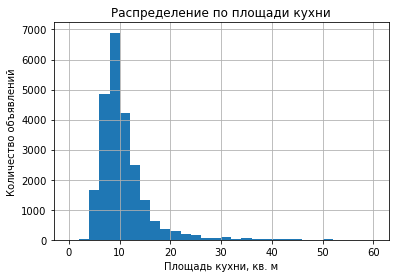

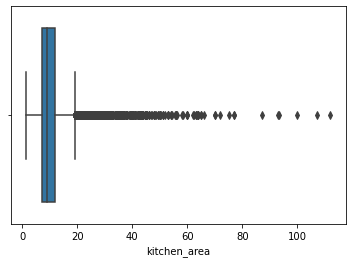

In [32]:
data.hist('kitchen_area', bins=30, range=(0,60))
plt.title('Распределение по площади кухни')
plt.xlabel('Площадь кухни, кв. м')
plt.ylabel('Количество объявлений')
plt.show()

sns.boxplot(x=data['kitchen_area'])
plt.show()

Отбросим значения, в которых кухня может быть меньше 4 кв. м. Квартиры, где кухня имеет большую площадь, имеют так 
же большую общую площадь, поэтому считать их выбросами нельзя.

In [37]:
data =data.query('kitchen_area >= 4')

#### 4.2.5 Проанализируем высоту потолков квартир

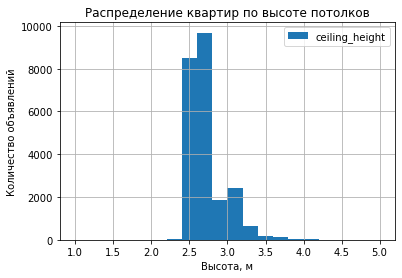

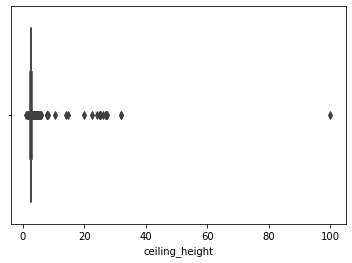

In [40]:
data.plot(kind='hist', y ='ceiling_height', grid=True, bins=20, range=(1, 5))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество объявлений')
plt.show()

sns.boxplot(x=data['ceiling_height'])
plt.show()

Будем считать, что минимальная высота потолков не должна быть меньше высоты потолков хрущевок, которая не меньше 2.5 м. А максимальная высота не должна превышать высоту потолков квартир на Невском проспекте, которые не выше 4.5 метров.

In [41]:
data = data.query('ceiling_height >= 2.4 and ceiling_height <= 4.5')

#### 4.2.6 Проанализируем количество комнат

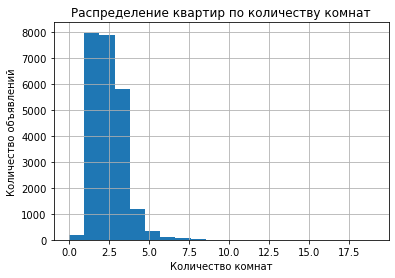

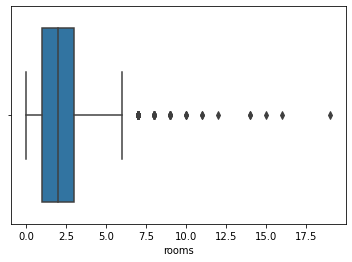

In [47]:
data.hist('rooms', bins=20, range=(0,19))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

sns.boxplot(x=data['rooms'])
plt.show()

Отбросим квартиры, где комнат меньше одной и больше 8.

In [98]:
data = data.query('rooms >= 1 and rooms <= 8')
data.rooms.value_counts()

1    7978
2    7897
3    5793
4    1174
5     321
6     101
7      56
8      12
Name: rooms, dtype: int64

<a name="subparagraph4.3"></a>
### 4.3 Определение факторов больше всего влияющих на стоимость квартиры

Выбирем параметры, для каждого из которых определим на сколько он хорошо коррелируют с ценой. 

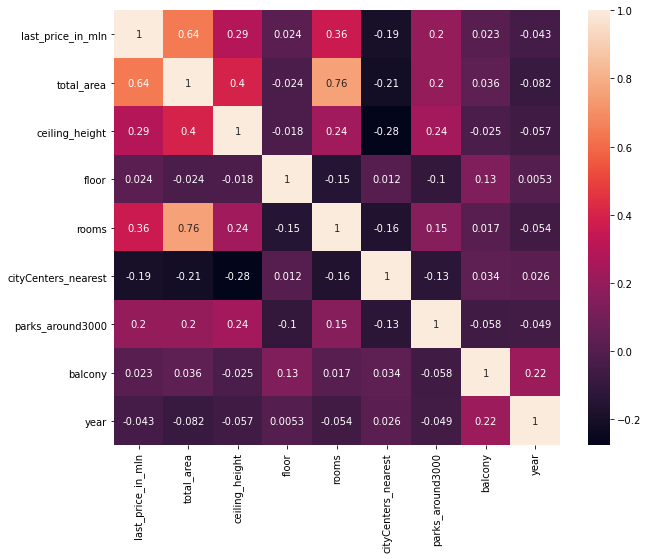

,last_price_in_mln,total_area,ceiling_height,floor,rooms,cityCenters_nearest,parks_around3000,balcony,year
last_price_in_mln,1.000000,0.641581,0.288312,0.023863,0.357444,-0.194972,0.201834,0.023105,-0.043398
total_area,0.641581,1.000000,0.400880,-0.023843,0.758343,-0.214504,0.201326,0.035753,-0.082301
ceiling_height,0.288312,0.400880,1.000000,-0.018033,0.235301,-0.275534,0.244085,-0.025359,-0.056817
floor,0.023863,-0.023843,-0.018033,1.000000,-0.149493,0.012028,-0.104262,0.134436,0.005304
rooms,0.357444,0.758343,0.235301,-0.149493,1.000000,-0.164234,0.154590,0.016708,-0.054425
cityCenters_nearest,-0.194972,-0.214504,-0.275534,0.012028,-0.164234,1.000000,-0.128428,0.034295,0.025713
parks_around3000,0.201834,0.201326,0.244085,-0.104262,0.154590,-0.128428,1.000000,-0.057910,-0.048821
balcony,0.023105,0.035753,-0.025359,0.134436,0.016708,0.034295,-0.057910,1.000000,0.220146
year,-0.043398,-0.082301,-0.056817,0.005304,-0.054425,0.025713,-0.048821,0.220146,1.000000


In [76]:
columns_for_corr = ['last_price_in_mln', 'total_area', 'ceiling_height', 'floor', 
                    'rooms', 'cityCenters_nearest', 'parks_around3000', 'balcony', 'year']

plt.figure(figsize=(10,8))
sns.heatmap(data[columns_for_corr].corr(), annot = True)
plt.show()
data[columns_for_corr].corr()

На тепловой карте видно, что цена коррелирует с общей площадью. Так же цена имеет более слабую корреляцию с количеством комнат, высотой потолков и числом парков в радиусе 3 км. Также присутствует отрицательная корреляция  с расстоянием до центра.

Далее сгруппируем эти параметры с ценой, для того что бы увидеть, как изменяется цена в зависимости от значений параметров.

In [103]:
def group_func(data, column):
    return data.pivot_table(index=column, values='last_price_in_mln').sort_values('last_price_in_mln',ascending=False).head()

parameters_for_group = ['floor', 'rooms', 'parks_around3000', 'year']

for parameter in parameters_for_group:
    print(group_func(data, parameter))
    print()

       last_price_in_mln
floor                   
30                10.150
33                 9.900
29                 9.200
10                 7.762
7                  7.753

       last_price_in_mln
rooms                   
7                 51.327
8                 50.224
6                 31.892
5                 22.724
4                 13.377

                  last_price_in_mln
parks_around3000                   
3                            14.711
2                            10.268
1                             7.902
0                             5.238

      last_price_in_mln
year                   
2014             12.087
2015              8.445
2016              6.818
2019              6.733
2017              6.532



### Вывод
        1. В среднем чем выше этаж, тем выше цена
        2. Чем больше комнат, тем выше цена
        3. Чем больше парков, тем выше цена
        4. Самая высокая цены пришлись на 2014г, после которого идет снижение.